# Data Preprocessing and Exploration

This task prepares the raw financial data for modeling, ensuring quality and consistency in the analysis. Accurate data preparation is crucial for reliable forecasts and risk analysis.

### Data Extraction and Cleaning
- **Data Sources**: YFinance API for assets: Tesla (TSLA), Vanguard Total Bond Market ETF (BND), and S&P 500 ETF (SPY).
- **Objective**: Ensure data accuracy and readiness for analysis by handling missing values, checking data types, and normalizing data as needed.

### Exploratory Data Analysis (EDA)
- **Trend Analysis**: Plot historical prices and daily percentage changes to understand each asset’s behavior.
- **Volatility Analysis**: Calculate rolling means and standard deviations to detect short-term fluctuations and overall volatility.
- **Outlier Detection**: Identify anomalies (e.g., days with extreme returns) to recognize patterns that could impact model performance.

### Seasonality and Trends
- **Decomposition**: Use decomposition techniques (e.g., with `statsmodels`) to separate the time series into trend, seasonal, and residual components.
- **Volatility Metrics**: Calculate Value at Risk (VaR) and Sharpe Ratio for a quantitative view of risk-adjusted returns.


In [1]:
import os
import sys

sys.path.insert(0,os.path.dirname(os.getcwd()))

In [2]:
# from scripts.forcustingModel import ForecastingModel

In [3]:
# scripts/run_pipeline.py
from scripts.data_loader import DataLoader
from scripts.data_cleaner import DataCleaner
from scripts.data_exploration import DataExplorer

In [4]:
tickers = ["TSLA", "BND", "SPY"]

# Load data
loader = DataLoader(tickers)
raw_data = loader.fetch_data()


Fetching data for TSLA...


[*********************100%***********************]  1 of 1 completed


Fetching data for BND...


[*********************100%***********************]  1 of 1 completed


Fetching data for SPY...


[*********************100%***********************]  1 of 1 completed


In [5]:

# Clean data
cleaner = DataCleaner()
cleaned_data = cleaner.clean_data(raw_data)

In [6]:
explorer = DataExplorer()

In [7]:
explorer.basic_statistics(cleaned_data)


Basic Statistics for TSLA:
Price     Adj Close        Close         High          Low         Open  \
Ticker         TSLA         TSLA         TSLA         TSLA         TSLA   
count   2222.000000  2222.000000  2222.000000  2222.000000  2222.000000   
mean     100.347979   100.347979   102.621767    97.971417   100.384231   
std      110.400660   110.400660   113.004063   107.748960   110.510465   
min        9.578000     9.578000    10.331333     9.403333     9.488000   
25%       16.594167    16.594167    16.827001    16.379168    16.590166   
50%       22.991666    22.991666    23.318666    22.578333    23.000000   
75%      207.425007   207.425007   211.142498   201.199162   206.737507   
max      409.970001   409.970001   414.496674   405.666656   411.470001   

Price         Volume  
Ticker          TSLA  
count   2.222000e+03  
mean    1.141356e+08  
std     7.772144e+07  
min     1.062000e+07  
25%     6.577875e+07  
50%     9.272235e+07  
75%     1.339394e+08  
max     9.1408

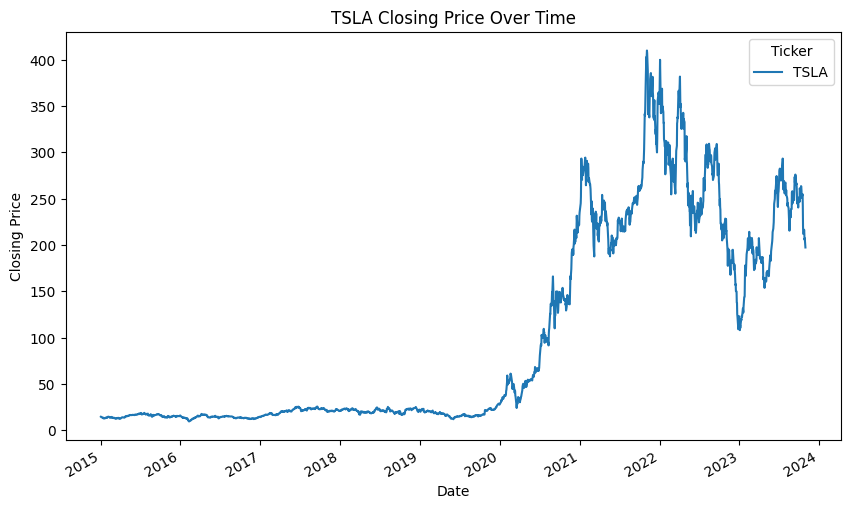

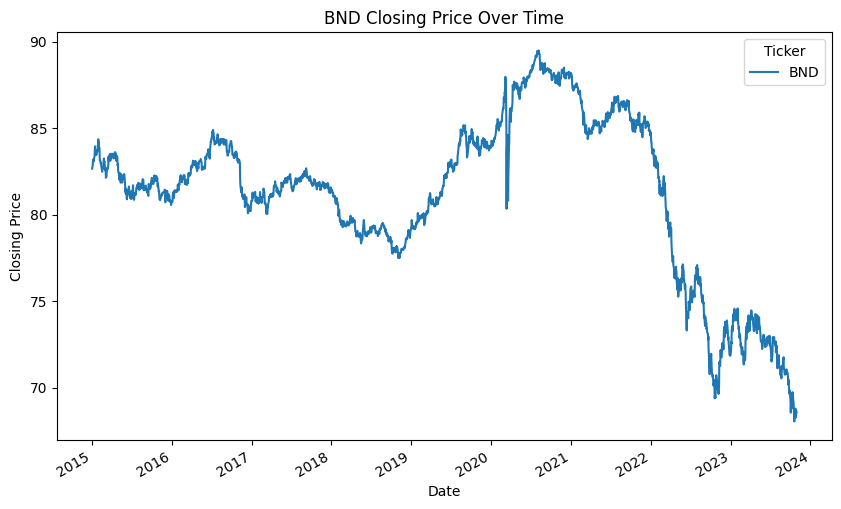

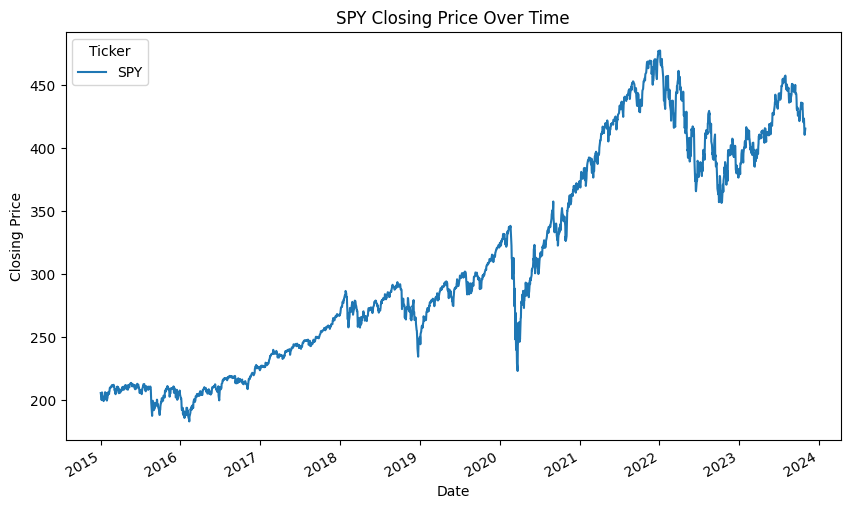

In [8]:
# Explore data

explorer.plot_closing_price(cleaned_data)

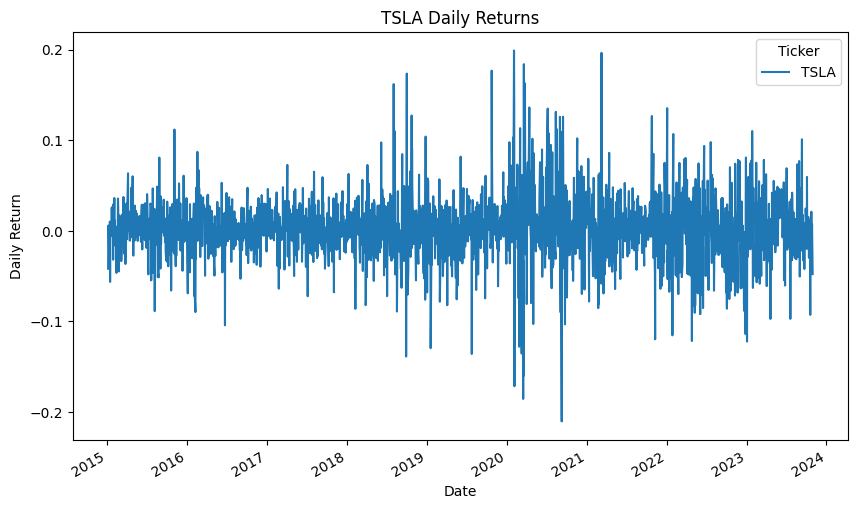

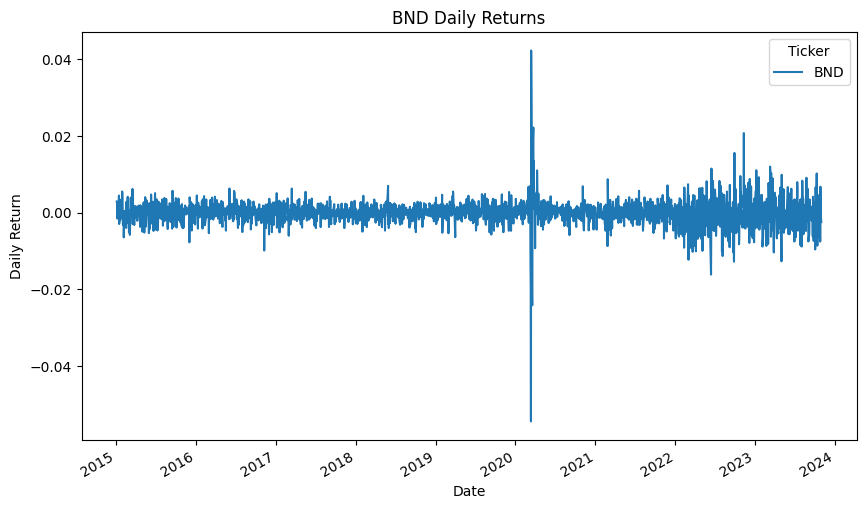

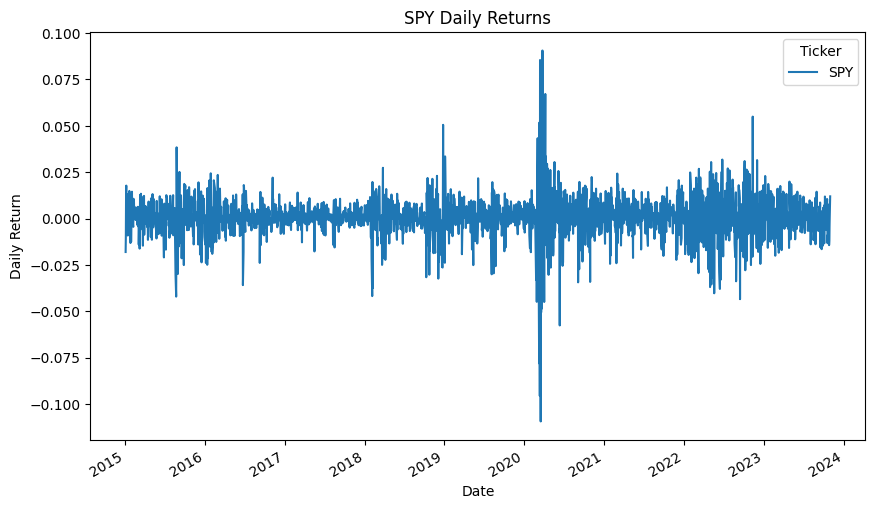

In [9]:
daily_returns = explorer.calculate_daily_returns(cleaned_data)
explorer.plot_daily_volatility(daily_returns)

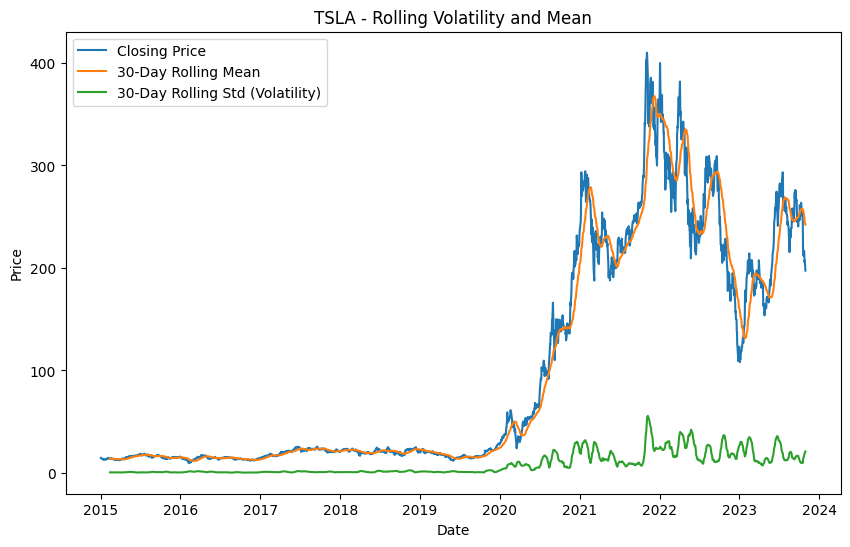

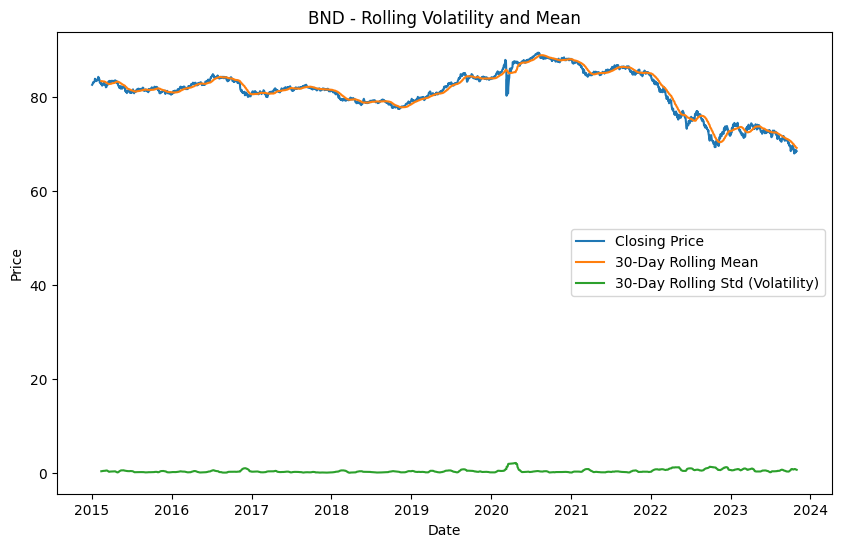

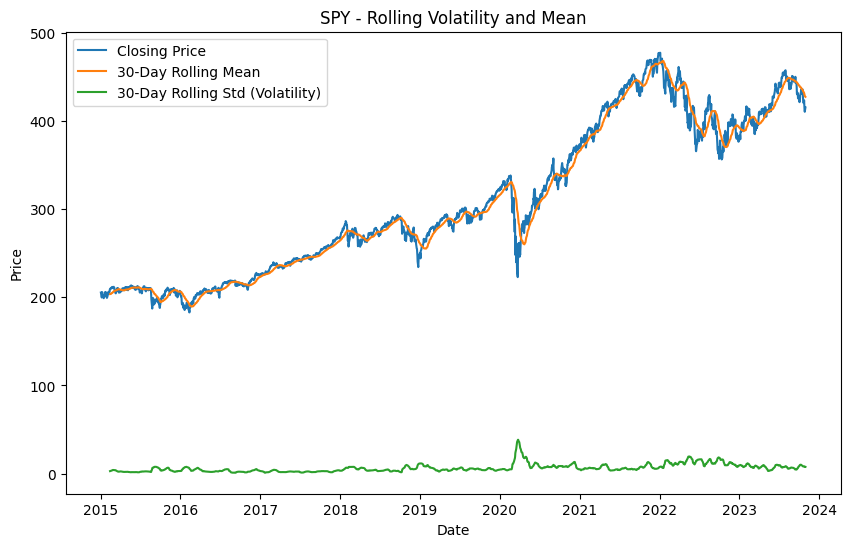

In [10]:
explorer.calculate_rolling_volatility(cleaned_data)

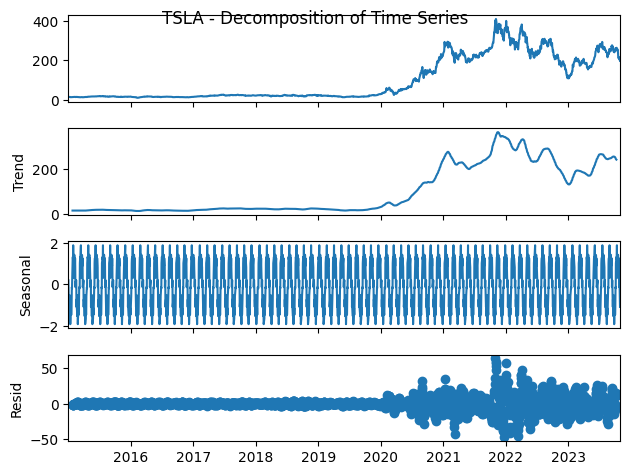

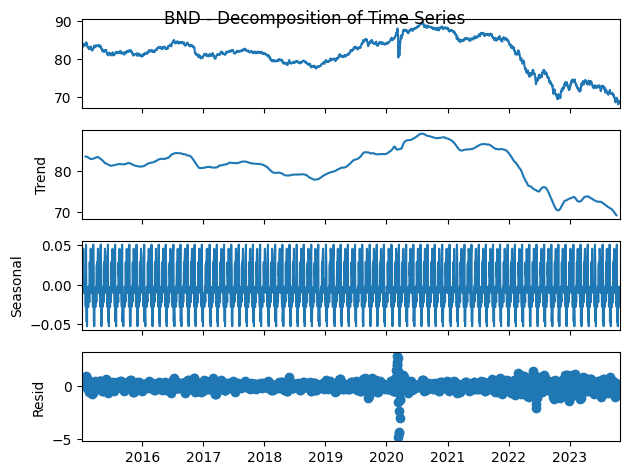

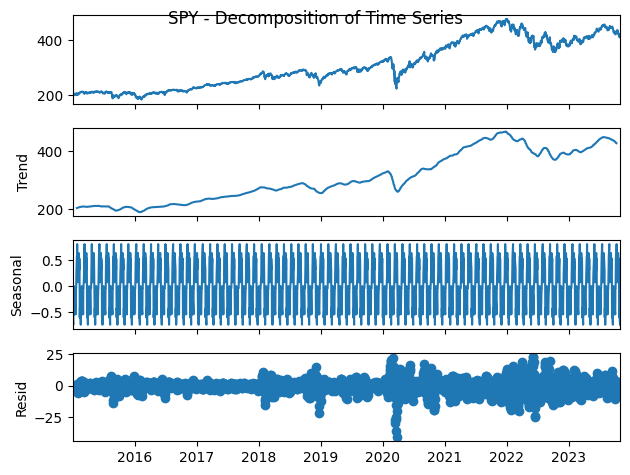

In [11]:
explorer.decompose_time_series(cleaned_data)

### Insights and Findings

#### Tesla (TSLA)
- **Trend**: Sharp upward trend with high volatility from 2020 onwards.
- **Volatility**: Elevated, especially during rapid price changes.
- **Risk**: High-risk, high-reward, appealing to growth-oriented investors.

#### Vanguard Total Bond Market ETF (BND)
- **Trend**: Stable with minor declines post-2020.
- **Volatility**: Low, suitable for conservative, risk-averse investors.
- **Risk**: Low, ideal for steady returns with minimal market exposure.

#### S&P 500 ETF (SPY)
- **Trend**: Consistent upward trend with recovery after the 2020 dip.
- **Volatility**: Moderate, stabilizes quickly after market shocks.
- **Risk**: Balanced, fitting for long-term growth with moderate risk.

#### Summary
- **TSLA**: High growth and risk.
- **BND**: Stability with low risk.
- **SPY**: Balanced growth and risk.


In [12]:
import pandas as pd

In [13]:
for ticker,df in cleaned_data.items():
    df=pd.DataFrame(df)
    df
    break

In [14]:
df["Close"]

Ticker,TSLA
Date,
2015-01-02 00:00:00+00:00,14.620667
2015-01-05 00:00:00+00:00,14.006000
2015-01-06 00:00:00+00:00,14.085333
2015-01-07 00:00:00+00:00,14.063333
2015-01-08 00:00:00+00:00,14.041333
...,...
2023-10-24 00:00:00+00:00,216.520004
2023-10-25 00:00:00+00:00,212.419998
2023-10-26 00:00:00+00:00,205.759995


In [15]:
from scripts.forcustingModel import ForecastingModel

In [16]:
# Instantiate and run forecasting
forecasting_model = ForecastingModel(df)
lstm_results, y_test_original, model = forecasting_model.lstm_forecasting()

# Evaluate forecast
evaluation = forecasting_model.evaluate_forecast(y_test_original, lstm_results)
print(evaluation)


Epoch 1/10


d:\10Academy\week11\week11\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0229
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0015
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0016
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0013
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0013
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0014
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0015
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0012
Epoch 9/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0012
Epoch 10/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0010
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step
{'MAE': np.float64(55.69121656541701), 'RMSE': np.float64(66.51920127880908)}


In [17]:
data=df["Close"]
# Initialize model
forecasting_model = ForecastingModel(df)

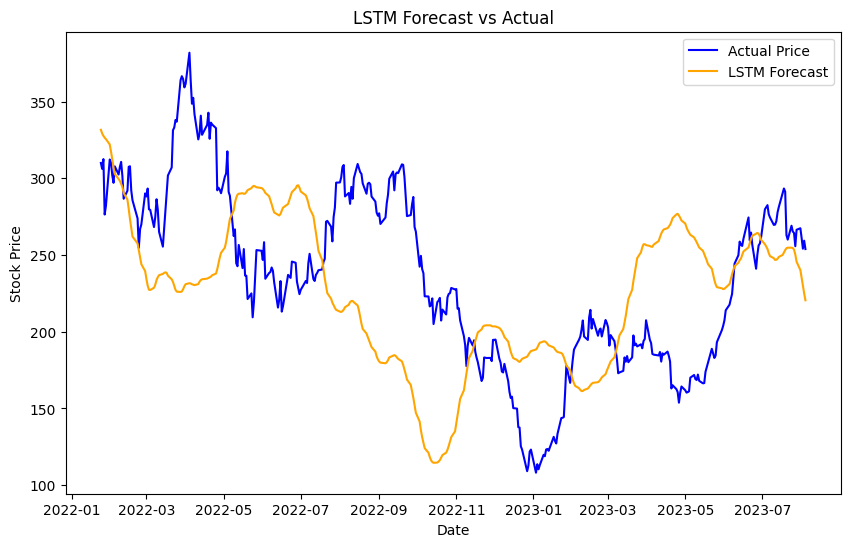

In [18]:
forecasting_model.plot_forecast(lstm_results,"LSTM")

In [19]:
df

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,,
2015-01-02 00:00:00+00:00,14.620667,14.620667,14.883333,14.217333,14.858000,71466000
2015-01-05 00:00:00+00:00,14.006000,14.006000,14.433333,13.810667,14.303333,80527500
2015-01-06 00:00:00+00:00,14.085333,14.085333,14.280000,13.614000,14.004000,93928500
2015-01-07 00:00:00+00:00,14.063333,14.063333,14.318667,13.985333,14.223333,44526000
2015-01-08 00:00:00+00:00,14.041333,14.041333,14.253333,14.000667,14.187333,51637500
...,...,...,...,...,...,...
2023-10-24 00:00:00+00:00,216.520004,216.520004,222.050003,214.110001,216.500000,118231100
2023-10-25 00:00:00+00:00,212.419998,212.419998,220.100006,212.199997,215.880005,107065100


In [20]:
from scripts.ForecastingFutureMarket import ForecastingFutureMarketTrends

In [21]:
futureMarketTrends=ForecastingFutureMarketTrends(model,df)

In [22]:
futureMarketTrends.generate_forecast()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━

array([[ 1.19852290e+07],
       [ 1.56366270e+07],
       [ 1.77581480e+07],
       [ 1.87861840e+07],
       [ 1.90537700e+07],
       [ 1.88053940e+07],
       [ 1.82143960e+07],
       [ 1.74005800e+07],
       [ 1.64436240e+07],
       [ 1.53955480e+07],
       [ 1.42892900e+07],
       [ 1.31451700e+07],
       [ 1.19751420e+07],
       [ 1.07867870e+07],
       [ 9.58383100e+06],
       [ 8.36849600e+06],
       [ 7.14196300e+06],
       [ 5.90485950e+06],
       [ 4.65722950e+06],
       [ 3.39991625e+06],
       [ 2.13267025e+06],
       [ 8.55591562e+05],
       [-4.31255000e+05],
       [-1.72781662e+06],
       [-3.03429425e+06],
       [-4.35013300e+06],
       [-5.67565600e+06],
       [-7.01085350e+06],
       [-8.35575550e+06],
       [-9.71040300e+06],
       [-1.10751070e+07],
       [-1.24493480e+07],
       [-1.38335500e+07],
       [-1.52277590e+07],
       [-1.66320760e+07],
       [-1.80465780e+07],
       [-1.94715660e+07],
       [-2.09066760e+07],
       [-2.2